# Проект A/B-тест

**Описание проекта**

Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки. Необходимо приоритизовать гипотезы, запустить A/B-тест и проанализировать результаты.

## Часть 1. Приоритизация гипотез.

### Задача
* Применив фреймворк ICE для приоритизации гипотез, отсортируем их по убыванию приоритета.
* Применив фреймворк RICE для приоритизации гипотез, отсортируем их по убыванию приоритета.

загрузим библиотеку и прочитаем данные

In [1]:
#импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
data.columns= data.columns.str.lower() #перевод в нижний регистр
pd.set_option('display.max_colwidth', -1)  #выводим всю строку

Reach — скольких пользователей затронет изменение, которое вы хотите внести;

Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;

Efforts — сколько стоит протестировать эту гипотезу.

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач:

In [4]:
data['ICE'] = (data['impact'] * data['confidence'] / data['efforts']).round(2)
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективными по фреймворку ICE являются гипотезы под номерами 8, 0, 7. 
Причиной тому является достаточно высокие значения парметра impact (насколько сильно изменение повлияет на охваченных пользователей) и параметра confidence( уверенность в оценках других параметров, в данном случае: влияние на пользовтелей и усилие), и низкие зачения параметра efforts (насколько сложно проверить гипотезу)

то есть гипотезы гипотезы под номерами 8, 0, 7 дсотаточно сильно повлияют на пользователей при небольших приложенных усилиях (напрмиер не задействована куча дополнительных специалистов), и в оценке критерий мы достаточно уверены.

In [5]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence'] / data['efforts']).round(2)
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективными по фреймворку RICE являются гипотезы под номерами 7, 2, 0. 
Гипотезы 7 и 2 имеют хороший охват - парметр reach, что делает их лидерами. Действительно форма подписки может увеличитьоват за счет инофрмирования пользователей, а информация о товаре упростить задачу покупки. А вот 0: "Добавить два новых канала привлечения трафика..." не имеет стль высокий охват, но имеет сильное влияние на пользователей.

По разным фреймворкам гипотезы 7 и 0 имеют хорошие перспективы. Стоит обратить внимание на них

## Часть 2. Анализ A/B-теста

Есть результаты A/B-теста, которые описаны в файлах orders.csv и visitors.csv.

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [6]:
#прочитаем данные и выведем информацию 
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')
display(orders.head(), visitors.head())


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
display(orders.info(), visitors.info())
display('дубликаты orders', orders.duplicated().sum(), 'дубликаты visitors', visitors.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

None

'дубликаты orders'

0

'дубликаты visitors'

0

In [8]:
#перевод в формат даты
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates()

In [9]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


проверим кол-во посетителей, входящие в группу А и В 9проверим есть ли такие)

In [10]:
groupA = orders[orders['group'] == 'A']
visitorsB=orders[orders['group'] == 'B']['visitorId'].unique()
groupA.query('visitorId in @visitorsB')

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
26,2223239646,199603092,2019-08-15,3488,A
29,2220299125,3803269165,2019-08-15,700,A
33,486237576,2378935119,2019-08-15,1650,A
41,2594268419,237748145,2019-08-15,1090,A
...,...,...,...,...,...
1167,3757656646,4186807279,2019-08-14,4990,A
1173,3612788481,2712142231,2019-08-14,2490,A
1178,4052155355,2949041841,2019-08-14,190,A
1183,1458356232,963407295,2019-08-14,4940,A


Оказалось, что таких посетителей 89 шт. В любом другом случае таких пользователей необходимо удалить. Но в нашем случае корректно удалить мы не сможем. Поэтому оставляем. Это возникло либо при сплитовании аудитории, либо например тестироващики могли проверить работоспособность в той и в другой группе.

ИТАК, По центральной предельной теореме значение кумулятивных метрик часто сходится и устанавливается около некоторого среднего. Тогда по графику кумулятивных метрик определяют, стоит останавливать тест или нет.

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий.
Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups. Далее вычислим максимальную дату. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:

In [11]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

In [12]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
        .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1)\
        .sort_values(by=['date', 'group'])

Объединим таблицы с посещениями и заказами

In [13]:
#объединение таблиц
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on =['date', 'group'], right_on =['date', 'group'])
#Переимнуем столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [14]:
#отфильтруем по группам 
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]

In [15]:
#функция для построения графиков по дате
def plots(x1, y1, x2, y2, title, ylabel):
    plt.figure(figsize=(10, 7))
    plt.plot(x1, y1, label='A')
    plt.plot(x2, y2, label='B')
    plt.xticks(rotation=90)
    plt.title(title, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.legend() 
    plt.show()

Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

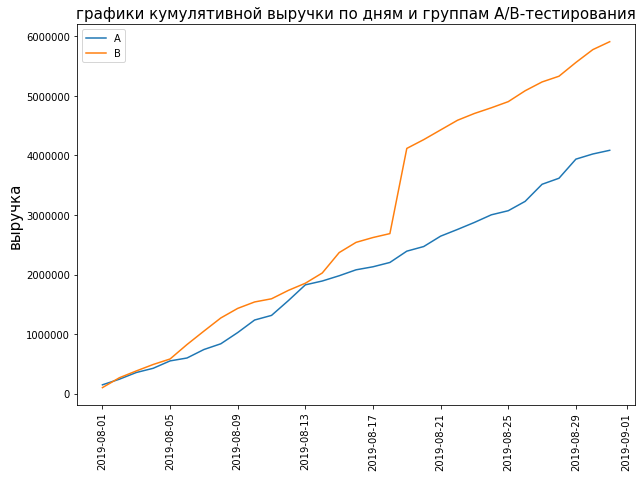

In [16]:
plots(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], \
     'графики кумулятивной выручки по дням и группам A/B-тестирования', 'выручка')

Выручка почти равномерно увеличивается в течение всего теста для группы А, для группы видим некоторый скачок.
График выручки группы В в некоторой точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем ниже

### Построим график кумулятивного среднего чека по группам. 

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

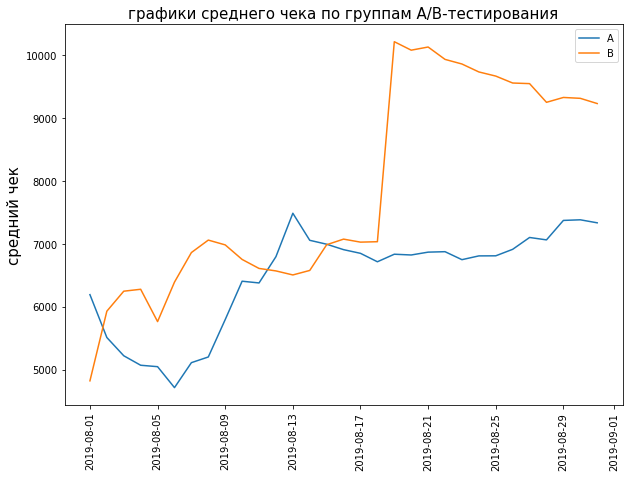

In [17]:
plots(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],\
        cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], \
     'графики среднего чека по группам A/B-тестирования', 'средний чек')


Средний чек становится равномерным от середины теста для группы А. Средний чек почти установился для группы A(немного продолжает расти) и скачет для группы B (в конце падает). В группу B в начале второй половины теста скорее всего попали крупные заказы (резкий всплеск на графике). Тогда для группы В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.
В начале, то есть в первой половине обе группы имели мелкие заказы, что видно на графике 

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

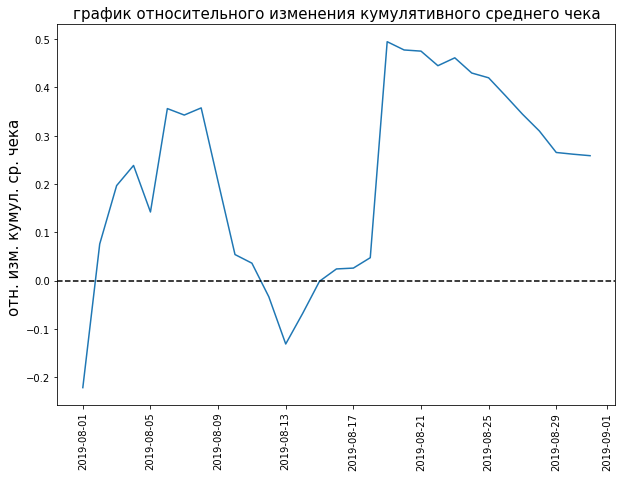

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.\
                            merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 7))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],\
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=90)
plt.title('график относительного изменения кумулятивного среднего чека',fontsize=15)
plt.ylabel('отн. изм. кумул. ср. чека ', fontsize=15)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

В нескольких точках график различия между сегментами резко «скачет», даже можно сказать что не устанавливается около одного значения. значит где-то точно есть крупные заказы и выбросы! 

### Построим график кумулятивной конверсии по группам.

Аналогично проанализируем график кумулятивной конверсии.

Text(0, 0.5, 'кумулятивная конверсия')

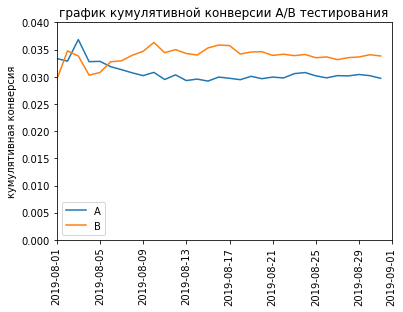

In [19]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.xticks(rotation=90)
plt.axis(["2019-08-01", "2019-09-01", 0, 0.04]) 
plt.title( 'график кумулятивной конверсии А/В тестирования')
plt.ylabel('кумулятивная конверсия')


График выглядит более менее симметричным. Однако конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А чуть просела и также зафиксировалась уже в первой четверти. Можно предположить что кажому пользователю приходится более менее одинаковое кол-во покупок. 

### Построим график относительного изменения кумулятивной конверсии группы B к группе A. 

Построим график относительного различия кумулятивных конверсий:

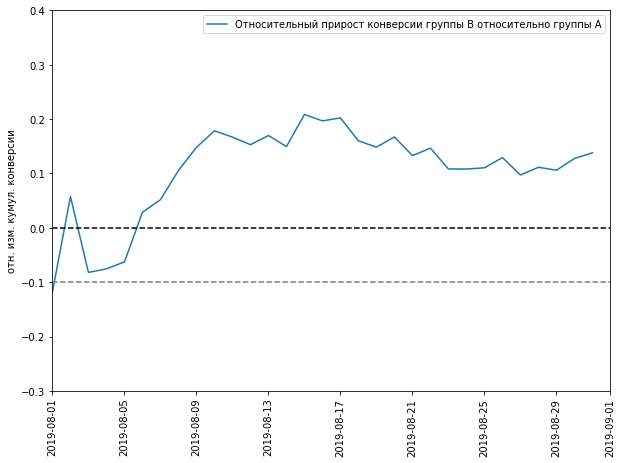

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 7))
plt.plot(mergedCumulativeConversions['date'], \
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, \
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.ylabel('отн. изм. кумул. конверсии')
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", "2019-09-01", -0.3, 0.4]) 
plt.show()

В начале теста группа B незначительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия продолжает расти и устанавливается примерно на одном уровне.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, далее сможем сделать более точные выводы. 

### Построим точечный график количества заказов по пользователям. 

Мы предположили чо есть аномалии, которые могут искажать результаты A/B-теста. Аномалия — такое значение, которое бывает в генеральной совокупности редко, но его попадание в выборку способно внести погрешность.

Подсчитаем количество заказов по пользователям и посмотрим на результат

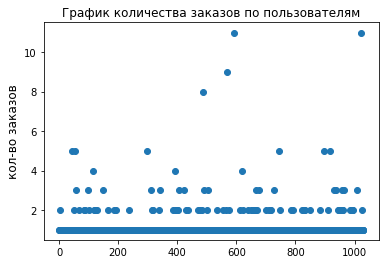

In [21]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.ylabel('кол-во заказов', fontsize=12)
plt.title('График количества заказов по пользователям')
plt.show()


Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна.
Их точная доля не ясна — непонятно, считать их аномалиями или нет.
Посчитаем выборочные перцентили количества заказов на одного пользователя:

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

Для подсчёта перцентилей применяют метод percentile() библиотеки Numpyю (В статистике N-й перцентиль — значение, которое случайная величина не превышает с заданной вероятностью.)

In [22]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. Не более 1% пользователей оформляли больше чем 4 заказа.
Разумно выбрать 4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

### Построим точечный график стоимостей заказов. 

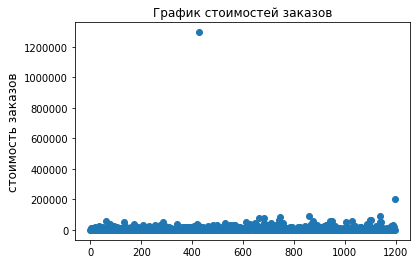

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.ylabel('стоимость заказов', fontsize=12)
plt.title('График стоимостей заказов')
plt.show()

Всё, как предполагали: есть пару очень дорогих заказов. По графику можно выбрать границу аномальных заказов до 100000 рублей. Однако по графику точно не отсеишь аномалии, поэтому посчитаем перцентили

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [24]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233,2 рублей. Выберем границу по стоимости зазказов ориентируясб на 99 перцентиль (по графику понятно, что многие пользователи совершали покупку в этом диапазоне)

Сформулируем гипотезы:

* нулевая гипотеза: 1) конверсии групп равны , 2) средние чеки исследуемых групп равны
* альтернативная гипотеза: 1) между группами существуют статистически значимые различия, 2)средние чеки исследуемых групп отличаются

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей

In [25]:
#пользователи группы А: дата-пользователь
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.\
    apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].\
    agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#пользователи группы В: дата-пользователь
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#количество пользователей до выбранной даты включительно в группе В
visitorsBCummulative = visitorsBDaily\
    .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
           .agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#заказы группы А:
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
#суммарное число заказов до выбранной даты включительно в группе A
ordersACummulative = ordersADaily\
            .apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),axis=1)\
            .sort_values(by=['date'])
    
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
#заказы группы B:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
#суммарное число заказов до выбранной даты включительно в группе B
ordersBCummulative = ordersBDaily\
                    .apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
                    .agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1)\
                    .sort_values(by=['date'])
    
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Посчитаем статистическую значимость различия в конверсии между группами. Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

Список индексов создали функцией np.arange(). Она работает так же, как функция range(), только создаёт массив индексов в формате np.array, который требуется в pd.Series

In [26]:
#для пользователей A, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
#для пользователей B, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

#Список с количеством заказов для каждого из пользователей
sampleA = pd.concat([ordersByUsersA['orders'], \
            pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
            name='orders',)], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],\
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),\
            name='orders',)], axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
#Выведем относительный прирост конверсии группы B
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.008
0.138


По «сырым» данным различий в конверсии групп A и B существуют.
Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 

Однако относительный выигрыш группы B равен 13,8%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.

In [27]:
#import scipy.stats as stats
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                                          orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()\
                       /orders[orders['group']=='A']['revenue'].mean()-1)) 

0.365
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
Средний чек группы B значительно выше среднего чека группы A на 26% почти

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 58233.2 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и  1% пользователей с дорогими заказами. 
Объединим их в таблице abnormalUsers.

In [28]:
#срезы пользователей с числом заказов больше 4
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],\
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis=0)
#пользователей, совершивших заказы дороже 58233.2
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']

#Объединим  в таблице abnormalUsers.
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

In [29]:
print(abnormalUsers.shape)

(15,)


Всего 15 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста.
Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 

In [30]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],\
        pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],\
    axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],\
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],\
    axis=0) 
#Применим статистический критерий Манна-Уитни к полученным выборкам:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


0.007
0.153


Результаты по конверсии практически не изменились.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [31]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],\
            orders[np.logical_and(orders['group'] == 'B',\
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',\
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
               / orders[np.logical_and(orders['group'] == 'A',\
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()  - 1)) 

0.425
-0.006


P-value увеличился, но и разница между сегментами сократилась с 26% (выше группа В) до 0,6% (выше группа А). то есть разницы практически нет в среднем чеке

Выводы:
* Статистически значимое различие по конверсии между группами по «сырым», по данным после фильтрации аномалий существует;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия конверсии между группами сообщает, что результаты группы В лучше группы А и существунт незначительная тенденция к улучшению:
* График различия среднего чека говорит о том, что результаты группы B лучше результатов группы В. Но пока явной тенденции не обнаружить, так как график скачет, хоть и группа В явно лучше группы А,на данный момент различие составляет около 20%
* Исходя из обнаруженных фактов, тест следует остановить и признать его успешным.

### Решение по результатам теста:  стоит остановить тест, зафиксировав победу группы В.

